In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
dfTest = pd.read_csv("C:/Users/Anthony/Downloads/test.csv")
dfTrain = pd.read_csv("C:/Users/Anthony/Downloads/train.csv")
dfSample = pd.read_csv("C:/Users/Anthony/Downloads/sample_submission.csv")

In [63]:
print(dfTest)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     168

In [64]:
dfTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [65]:
print(dfSample)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
5     1466  177150.989247
6     1467  172070.659229
7     1468  175110.956520
8     1469  162011.698832
9     1470  160726.247831
10    1471  157933.279456
11    1472  145291.245020
12    1473  159672.017632
13    1474  164167.518302
14    1475  150891.638244
15    1476  179460.965187
16    1477  185034.628914
17    1478  182352.192645
18    1479  183053.458214
19    1480  187823.339254
20    1481  186544.114328
21    1482  158230.775205
22    1483  190552.829321
23    1484  147183.674872
24    1485  185855.300905
25    1486  174350.470677
26    1487  201740.620691
27    1488  162986.378896
28    1489  162330.199086
29    1490  165845.938617
...    ...            ...
1429  2890  160515.850579
1430  2891  192167.621096
1431  2892  178751.551083
1432  2893  198678.894117
1433  2894  164553.120272
1434  2895  156887.932862
1435  2896  

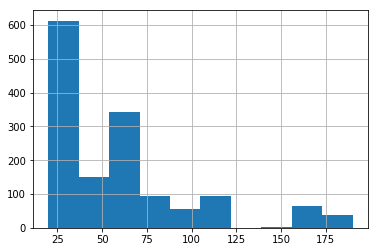

In [66]:
dfTest.MSSubClass.hist() #for reference display the housing subclasses as a histogram

In [67]:
print ("Unique Feautures: ", dfTrain.MiscFeature.unique()) #Display unique values in dataset

Unique Feautures:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [68]:
categories = dfTrain.select_dtypes(exclude=[np.number]) #Break down into categories and display categorical values
categories.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [69]:
print ("Original: ") 
print (dfTrain.Street.value_counts())     #Display number of entries with gravel and Paved driveways

Original: 
Pave    1454
Grvl       6
Name: Street, dtype: int64


In [70]:
dfTrain['dummieStreet'] = pd.get_dummies(dfTrain.Street, drop_first=True)
dfTest['dummieStreet'] = pd.get_dummies(dfTrain.Street, drop_first=True)

#Create dummies of street values to allow for numerical engineering

In [71]:
print ('Encoded: \n') 
print (dfTrain.dummieStreet.value_counts())


Encoded: 

1    1454
0       6
Name: dummieStreet, dtype: int64


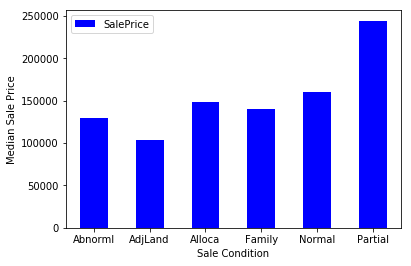

In [72]:
condition = dfTrain.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#Engineering the salescondition section by creating a pivot table

In [73]:
def encode(x): return 1 if x == 'Partial' else 0
dfTrain['dummieCondition'] = dfTrain.SaleCondition.apply(encode)
dfTest['dummieCondition'] = dfTest.SaleCondition.apply(encode)

#like street value, we create a dummie value for the salescondition
#to allow for further engineering

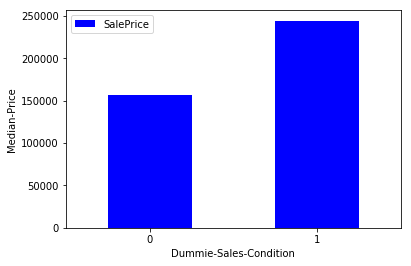

In [74]:
condition = dfTrain.pivot_table(index='dummieCondition', values='SalePrice', aggfunc=np.median)
condition.plot(kind='bar', color='blue')
plt.xlabel('Dummie-Sales-Condition')
plt.ylabel('Median-Price')
plt.xticks(rotation=0)
plt.show()

#New Pivot table created with the dummie conditions

In [75]:
AnyNullData = dfTrain.select_dtypes(include=[np.number]).interpolate().dropna()
sum(AnyNullData.isnull().sum() != 0)

#Checking for null values in dfTrain

0

In [76]:
y = np.log(dfTrain.SalePrice)
X = AnyNullData.drop(['SalePrice', 'Id'], axis=1)
#We are begginging to build the linear model

In [77]:
X_dfTrain, X_dfTest, y_dfTrain, y_dfTest = train_test_split(
                                    X, y, random_state=52, test_size=.43)

#Creating and designing our data's subjests and target variables

In [78]:
lr = linear_model.LinearRegression()  #Create instance of linear model
model = lr.fit(X_dfTrain, y_dfTrain)      #Fitting Instanciated model with X_Train and Y_Train
print ("R-sqaured: \n", model.score(X_dfTest, y_dfTest))   #Data Evaluation

R-sqaured: 
 0.8581660307733967


In [79]:
predictions = model.predict(X_dfTest)   #Establish Predictions

In [80]:
print ('RMSE: ', mean_squared_error(y_dfTest, predictions))
#Calculating a Root-Mean-Squared Error of arrays y_dfTest and predicitons

RMSE:  0.023294565231330135


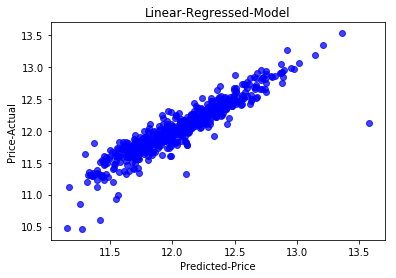

In [81]:
actual_values = y_dfTest
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') 
plt.xlabel('Predicted-Price')
plt.ylabel('Price-Actual')
plt.title('Linear-Regressed-Model')
plt.show()

#Visualizing the relationship between our predicted-prices and
#our actual prices

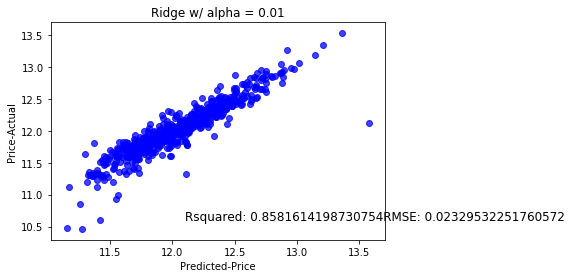

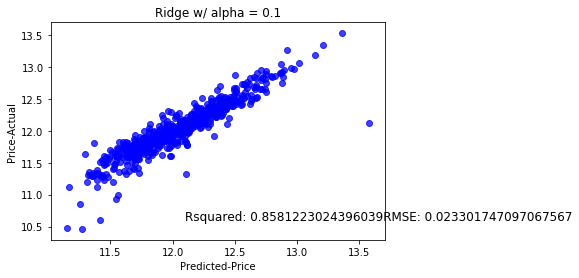

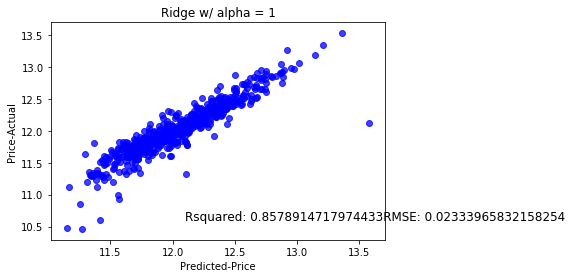

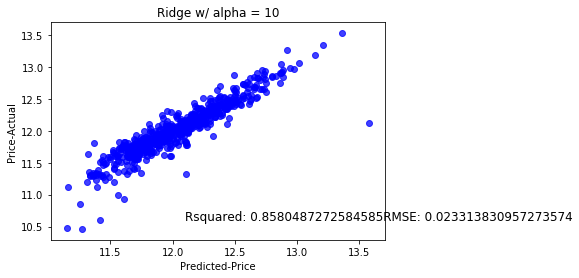

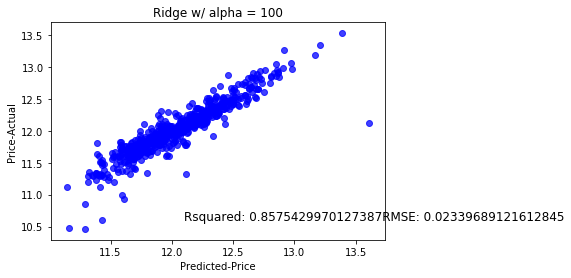

In [82]:
for i in range (-2, 3):
    alpha = 10**i
    RM = linear_model.Ridge(alpha=alpha)
    ridge_model = RM.fit(X_dfTrain, y_dfTrain)
    preds_ridge = ridge_model.predict(X_dfTest)
    
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted-Price')
    plt.ylabel('Price-Actual')
    
    plt.title('Ridge w/ alpha = {}'.format(alpha))
    overlay = 'Rsquared: {}RMSE: {}'.format(
                    ridge_model.score(X_dfTest, y_dfTest),
                    mean_squared_error(y_dfTest, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='large')
    plt.show()

    #Through using Ridge Regularization we can refine the model to 
    #remove less important values.

In [83]:
submission = pd.DataFrame()
submission['Id'] = dfTest.Id    #Establishing a dataframe for the submission

In [84]:
feats = dfTest.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
#Selecting our desired datatypes

In [85]:
predictions = model.predict(feats)
#Declare the predictions

In [86]:
final_predictions = np.exp(predictions);
#Converting prediction into the proper form.

In [87]:
print ("Original-predictions:", predictions[:10])
print ("Final-predictions: ", final_predictions[:10])
#Analyzing the two differences

Original-predictions: [11.65765503 11.8652347  11.99257433 12.1558713  12.1116259  12.06219118
 12.20506614 12.02180316 12.14765573 11.68615447]
Final-predictions:  [115572.69843759 142234.8300022  161550.70412371 190207.58346656
 181975.23842045 173198.0790396  199798.79946311 166342.32787027
 188651.32144545 118913.83928933]


In [88]:
submission['SalePrice'] = final_predictions
submission.head()

#Assigning predictions to their variables and double checking

,Id,SalePrice
0,1461,115572.698438
1,1462,142234.830002
2,1463,161550.704124
3,1464,190207.583467
4,1465,181975.238420


In [89]:
submission.to_csv('submission2.csv', index=False)
#Finally Writing predictions to the Submission2.csv file.